<a href="https://colab.research.google.com/github/Dubeyrock/-Generating-Realistic-Images-with-GANs-/blob/main/Task_3_Implement_a_Generative_Adversarial_Network_(GAN)_using_TensorFlow_to_generate_realistic_images(animal)_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Task 3 :-



Implement a Generative Adversarial Network (GAN) using TensorFlow or PyTorch to generate realistic images of a specific object category (e.g., faces, animals). Train the GAN on a small dataset and showcase a few generated images.

 1. Define the Problem and Gather Data

Identify the object category.

Collect a small dataset.

Load DataSet- (CIFAR-10 or CIFAR-100: Small image datasets with multiple classes, including animals.)

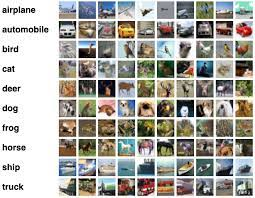

 2 . **Import necessary libraries**

In [ ]:
# Import TensorFlow for deep learning
import tensorflow as tf
from tensorflow.keras import layers, models

# Import PyTorch for deep learning
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader
from torchvision import datasets, transforms
from keras.optimizers import Adam
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Reshape
from keras.layers import Flatten
from keras.layers import Conv2D


# Additional libraries for data manipulation, visualization, and evaluation
import numpy as np
import matplotlib.pyplot as plt


**3.Preprocess Data**

In [ ]:
# Bringing in tensorflow
import tensorflow as tf
gpus = tf.config.experimental.list_physical_devices('GPU')
for gpu in gpus:
    tf.config.experimental.set_memory_growth(gpu, True)

In [ ]:
import tensorflow_datasets as tfds
from matplotlib import pyplot as plt

In [ ]:
ds = tfds.load('cifar10', split = 'train')

Dl Completed...: 0 url [00:00, ? url/s]

Dl Size...: 0 MiB [00:00, ? MiB/s]

Extraction completed...: 0 file [00:00, ? file/s]

Generating splits...:   0%|          | 0/2 [00:00<?, ? splits/s]

Generating train examples...:   0%|          | 0/50000 [00:00<?, ? examples/s]

Shuffling /root/tensorflow_datasets/cifar10/3.0.2.incompleteZHV7C6/cifar10-train.tfrecord*...:   0%|          …

Generating test examples...:   0%|          | 0/10000 [00:00<?, ? examples/s]

Shuffling /root/tensorflow_datasets/cifar10/3.0.2.incompleteZHV7C6/cifar10-test.tfrecord*...:   0%|          |…

Dataset cifar10 downloaded and prepared to /root/tensorflow_datasets/cifar10/3.0.2. Subsequent calls will reuse this data.


In [ ]:
ds

<_PrefetchDataset element_spec={'id': TensorSpec(shape=(), dtype=tf.string, name=None), 'image': TensorSpec(shape=(32, 32, 3), dtype=tf.uint8, name=None), 'label': TensorSpec(shape=(), dtype=tf.int64, name=None)}>

In [ ]:
type(ds)

tensorflow.python.data.ops.prefetch_op._PrefetchDataset

In [ ]:
ds.as_numpy_iterator().next()

{'id': b'train_16399',
 'image': array([[[143,  96,  70],
         [141,  96,  72],
         [135,  93,  72],
         ...,
         [ 96,  37,  19],
         [105,  42,  18],
         [104,  38,  20]],
 
        [[128,  98,  92],
         [146, 118, 112],
         [170, 145, 138],
         ...,
         [108,  45,  26],
         [112,  44,  24],
         [112,  41,  22]],
 
        [[ 93,  69,  75],
         [118,  96, 101],
         [179, 160, 162],
         ...,
         [128,  68,  47],
         [125,  61,  42],
         [122,  59,  39]],
 
        ...,
 
        [[187, 150, 123],
         [184, 148, 123],
         [179, 142, 121],
         ...,
         [198, 163, 132],
         [201, 166, 135],
         [207, 174, 143]],
 
        [[187, 150, 117],
         [181, 143, 115],
         [175, 136, 113],
         ...,
         [201, 164, 132],
         [205, 168, 135],
         [207, 171, 139]],
 
        [[195, 161, 126],
         [187, 153, 123],
         [186, 151, 128],
         .

In [ ]:
ds.as_numpy_iterator().next().keys()

dict_keys(['id', 'image', 'label'])

In [ ]:
(train_images, train_labels), (_,_) = tf.keras.datasets.cifar100.load_data()

In [ ]:
print(train_images.shape)


(50000, 32, 32, 3)


In [ ]:
train_images = train_images.reshape((50000, 32, 32, 3)).astype('float32')
train_images = (train_images - 127.5) / 127.5  # normalize the images to [-1,1]


In [ ]:
len(train_images)

50000

**Data and Build Dataset**

In [ ]:
import numpy as np


In [ ]:
dataiterator = ds.as_numpy_iterator()

In [ ]:
dataiterator.next()

{'id': b'train_16399',
 'image': array([[[143,  96,  70],
         [141,  96,  72],
         [135,  93,  72],
         ...,
         [ 96,  37,  19],
         [105,  42,  18],
         [104,  38,  20]],
 
        [[128,  98,  92],
         [146, 118, 112],
         [170, 145, 138],
         ...,
         [108,  45,  26],
         [112,  44,  24],
         [112,  41,  22]],
 
        [[ 93,  69,  75],
         [118,  96, 101],
         [179, 160, 162],
         ...,
         [128,  68,  47],
         [125,  61,  42],
         [122,  59,  39]],
 
        ...,
 
        [[187, 150, 123],
         [184, 148, 123],
         [179, 142, 121],
         ...,
         [198, 163, 132],
         [201, 166, 135],
         [207, 174, 143]],
 
        [[187, 150, 117],
         [181, 143, 115],
         [175, 136, 113],
         ...,
         [201, 164, 132],
         [205, 168, 135],
         [207, 171, 139]],
 
        [[195, 161, 126],
         [187, 153, 123],
         [186, 151, 128],
         .

In [ ]:
ax

array([<Axes: title={'center': '5'}>, <Axes: title={'center': '2'}>,
       <Axes: title={'center': '9'}>, <Axes: title={'center': '6'}>,
       <Axes: title={'center': '6'}>, <Axes: title={'center': '9'}>,
       <Axes: title={'center': '9'}>, <Axes: title={'center': '3'}>,
       <Axes: title={'center': '0'}>, <Axes: title={'center': '8'}>],
      dtype=object)

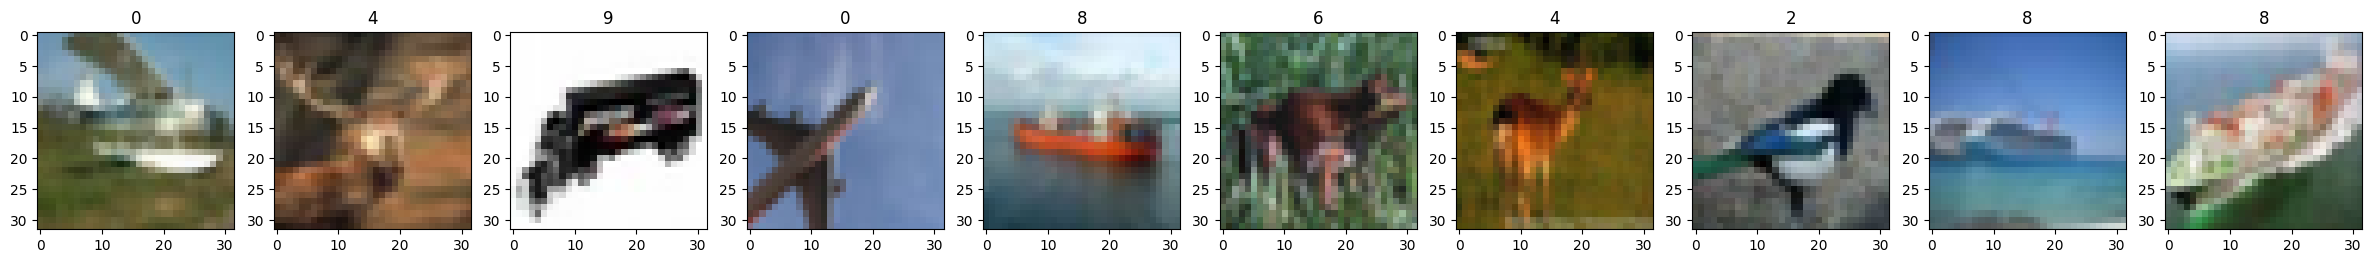

In [ ]:
# Setup the subplot formatting
fig, ax = plt.subplots(ncols=10, figsize=(30,30))
# Loop four times and get images
for idx in range(10):
    # Grab an image and label
    sample = dataiterator.next()
    # Plot the image using a specific subplot
    ax[idx].imshow(np.squeeze(sample['image']))
    # Appending the image label as the plot title
    ax[idx].title.set_text(sample['label'])

In [ ]:
# Scale and return images only
def scale_images(data):
    image = data['image']
    return image / 255

In [ ]:
# Reload the dataset
ds = tfds.load('cifar10', split='train')
# Running the dataset through the scale_images preprocessing step
ds = ds.map(scale_images)
# Cache the dataset for that batch
ds = ds.cache()
# Shuffle it up
ds = ds.shuffle(50000)
# Batch into 128 images per sample
ds = ds.batch(128)
# Reduces the likelihood of bottlenecking
ds = ds.prefetch(64)

In [ ]:
ds.as_numpy_iterator().next().shape

(128, 32, 32, 3)

In [ ]:
# Load a dataset using TensorFlow Datasets
def load_dataset(dataset_name, split='train', batch_size=32):
    dataset, info = tfds.load(name=dataset_name, split=split, with_info=True)
    dataset = dataset.shuffle(1000).batch(batch_size).prefetch(tf.data.AUTOTUNE)
    return dataset, info

In [ ]:
np.squeeze(dataiterator.next()['image']).shape

(32, 32, 3)

Dl Completed...: 0 url [00:00, ? url/s]

Dl Size...: 0 MiB [00:00, ? MiB/s]

Extraction completed...: 0 file [00:00, ? file/s]

Generating splits...:   0%|          | 0/2 [00:00<?, ? splits/s]

Generating train examples...:   0%|          | 0/50000 [00:00<?, ? examples/s]

Shuffling /root/tensorflow_datasets/cifar100/3.0.2.incompleteLHNKDH/cifar100-train.tfrecord*...:   0%|        …

Generating test examples...:   0%|          | 0/10000 [00:00<?, ? examples/s]

Shuffling /root/tensorflow_datasets/cifar100/3.0.2.incompleteLHNKDH/cifar100-test.tfrecord*...:   0%|         …

Dataset cifar100 downloaded and prepared to /root/tensorflow_datasets/cifar100/3.0.2. Subsequent calls will reuse this data.


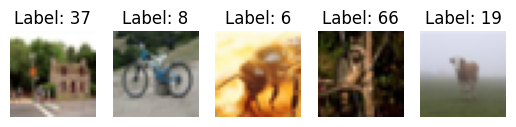

In [ ]:
# Example: Load the CIFAR-100 dataset
dataset_name = 'cifar100'
train_dataset, info = load_dataset('cifar100')

# Visualize a few images from the dataset
def visualize_dataset(dataset, num_samples=5):
    for data in dataset.take(1):
        images = data['image'][:num_samples].numpy()
        labels = data['label'][:num_samples].numpy()
        for i in range(num_samples):
            plt.subplot(1, num_samples, i + 1)
            plt.imshow(images[i])
            plt.title(f"Label: {labels[i]}")
            plt.axis('off')
        plt.show()

# Visualize the loaded CIFAR-100 dataset
visualize_dataset(train_dataset)

 4 . Build Generator and Discriminator Networks

Define generator and discriminator
  architectures.

 **Implement a Generative Adversarial Network (GAN) using TensorFlow**

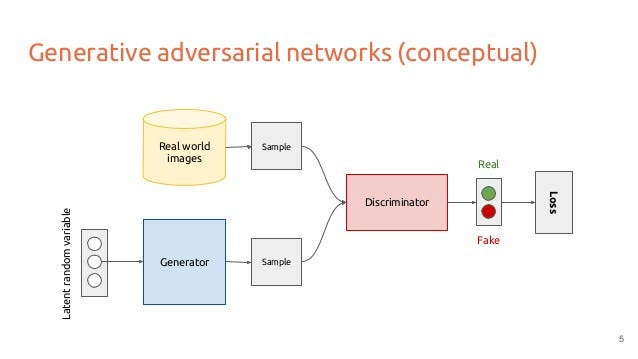



Generative Adversarial Networks (GANs) Overview:
Objective:
The primary goal of a Generative Adversarial Network (GAN) is to generate new data samples that resemble a given training dataset. GANs consist of two neural networks, a generator, and a discriminator, which are trained together in a competitive manner.

Components:

Generator:

The generator takes random noise as input and generates synthetic data samples.
It starts with random noise and gradually refines its output to resemble real data.
Discriminator:

The discriminator is a binary classifier that distinguishes between real and generated data.
It is trained to classify real data as real (label 1) and generated data as fake (label 0).
Training Process:

Generator Training:

The generator aims to produce data that is indistinguishable from real data.
It takes random noise as input and generates synthetic samples.
The generator's objective is to fool the discriminator into classifying its output as real.
Discriminator Training:

The discriminator is trained on a mix of real and generated data.
It learns to correctly classify real data as real and generated data as fake.
The discriminator's objective is to correctly classify the source of the data.

**Build Neural Network**

3.1 import modelling Components

In [ ]:
# Bring in the sequential api for the generator and discriminator
from tensorflow.keras.models import Sequential
# Bring in the layers for the neural network
from tensorflow.keras.layers import Conv2D, Dense, Flatten, Reshape, LeakyReLU, Dropout, UpSampling2D

In [ ]:
# Generator model
def build_generator(latent_dim, img_shape):
    model = models.Sequential()
    model.add(layers.Dense(256, input_dim=latent_dim))
    model.add(layers.LeakyReLU(alpha=0.01))
    model.add(layers.Reshape((8, 8, 4)))  # Adjust the dimensions based on your requirements
    model.add(layers.Conv2DTranspose(128, kernel_size=4, strides=2, padding="same"))
    model.add(layers.LeakyReLU(alpha=0.01))
    model.add(layers.Conv2DTranspose(64, kernel_size=4, strides=2, padding="same"))
    model.add(layers.LeakyReLU(alpha=0.01))
    model.add(layers.Conv2DTranspose(1, kernel_size=4, strides=2, padding="same", activation="sigmoid"))
    return model

In [ ]:
# Discriminator model
def build_discriminator(img_shape):
    model = models.Sequential()
    model.add(layers.Conv2D(64, kernel_size=4, strides=2, padding="same", input_shape=img_shape))
    model.add(layers.LeakyReLU(alpha=0.01))
    model.add(layers.Conv2D(128, kernel_size=4, strides=2, padding="same"))
    model.add(layers.LeakyReLU(alpha=0.01))
    model.add(layers.Flatten())
    model.add(layers.Dense(1, activation="sigmoid"))
    return model


In [ ]:
# Define the GAN model
def build_gan(generator, discriminator):
    discriminator.trainable = False  # Freeze discriminator weights during GAN training
    model = models.Sequential()
    model.add(generator)
    model.add(discriminator)
    return model

In [ ]:
# Set up the models
latent_dim = 100  # Dimensionality of the random noise vector
img_shape = (64, 64, 1)  # Adjust based on your image size and channels

generator = build_generator(latent_dim, img_shape)
discriminator = build_discriminator(img_shape)

In [ ]:
# Compile discriminator (use binary crossentropy for a binary classification task)
discriminator.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.0002, beta_1=0.5),
                      loss='binary_crossentropy', metrics=['accuracy'])


In [ ]:
# Compile the GAN model
discriminator.trainable = False
gan = build_gan(generator, discriminator)
gan.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.0002, beta_1=0.5),
            loss='binary_crossentropy')

In [ ]:
# Display model summaries
generator.summary()
discriminator.summary()
gan.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 256)               25856     
                                                                 
 leaky_re_lu_6 (LeakyReLU)   (None, 256)               0         
                                                                 
 reshape_2 (Reshape)         (None, 8, 8, 4)           0         
                                                                 
 conv2d_transpose_6 (Conv2D  (None, 16, 16, 128)       8320      
 Transpose)                                                      
                                                                 
 leaky_re_lu_7 (LeakyReLU)   (None, 16, 16, 128)       0         
                                                                 
 conv2d_transpose_7 (Conv2D  (None, 32, 32, 64)        131136    
 Transpose)                                           

In [ ]:
img = generator.predict(np.random.randn(4,128,1))

1/1 [==============================] - 0s 300ms/step


 3.2 . **Build Generator Networks**

1/1 [==============================] - 0s 202ms/step


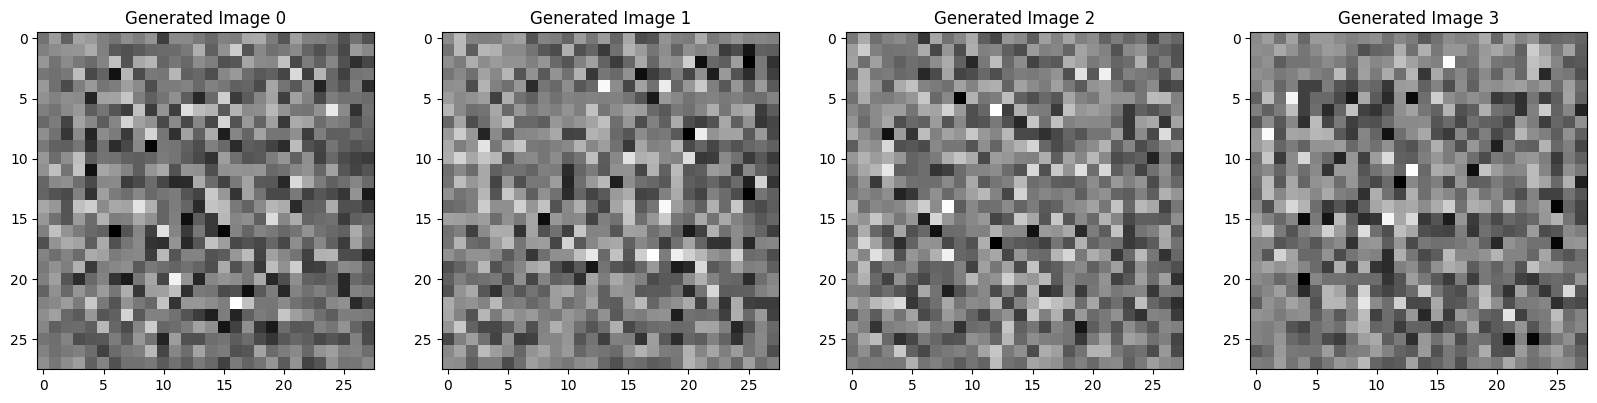

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Reshape, BatchNormalization, LeakyReLU, Conv2DTranspose, Conv2D, Flatten

def build_generator(latent_dim):
    model = Sequential()

    # Project and reshape the random input
    model.add(Dense(128 * 7 * 7, input_dim=latent_dim))
    model.add(Reshape((7, 7, 128)))
    model.add(BatchNormalization())
    model.add(LeakyReLU(0.2))

    # Upsampling to generate a larger image
    model.add(Conv2DTranspose(128, kernel_size=4, strides=2, padding='same'))
    model.add(BatchNormalization())
    model.add(LeakyReLU(0.2))

    # Another upsampling layer
    model.add(Conv2DTranspose(128, kernel_size=4, strides=2, padding='same'))
    model.add(BatchNormalization())
    model.add(LeakyReLU(0.2))

    # Final convolutional layer to generate the output image
    model.add(Conv2D(1, kernel_size=7, activation='sigmoid', padding='same'))

    return model

# Assuming you already have the generator model defined (e.g., using build_generator function)
latent_dim = 128
unique_generator = build_generator(latent_dim)

# Generate images using the unique generator
generated_images = unique_generator.predict(np.random.randn(4, latent_dim))

# Setup the subplot formatting
fig, ax = plt.subplots(ncols=4, figsize=(20, 20))

# Loop four times and get images
for idx, img in enumerate(generated_images):
    # Plot the image using a specific subplot
    ax[idx].imshow(np.squeeze(img), cmap='gray')  # Assuming grayscale images
    # Appending the image label as the plot title
    ax[idx].title.set_text(f"Generated Image {idx}")

# Display the generated images
plt.show()


1/1 [==============================] - 0s 307ms/step


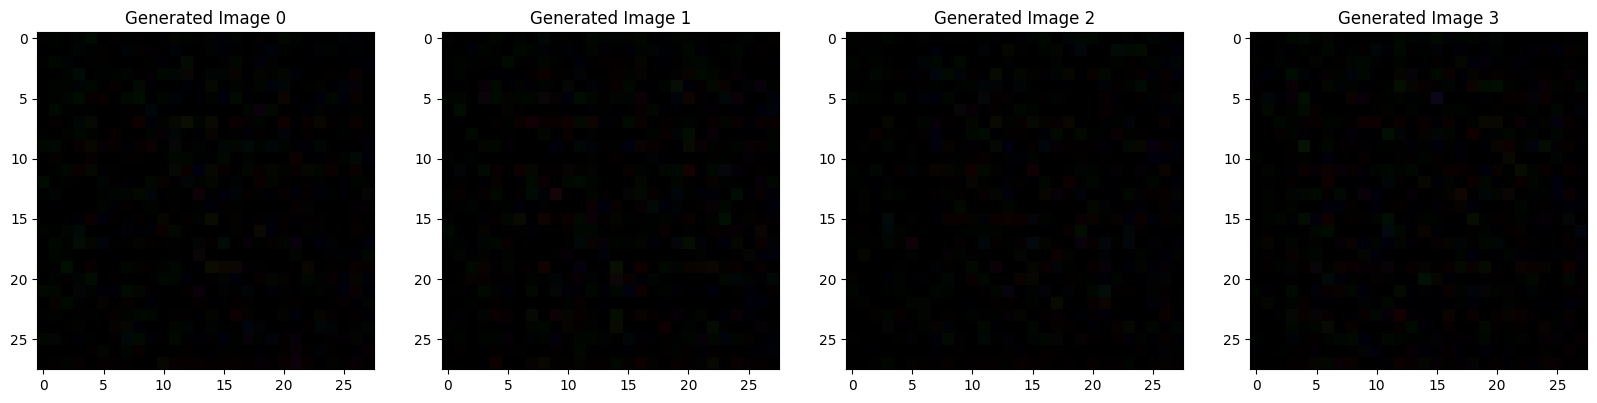

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Assuming you already have the generator model defined (e.g., using build_generator function)
latent_dim = 128
unique_generator = build_generator(latent_dim)

# Generate images using the unique generator
generated_images = unique_generator.predict(np.random.randn(4, latent_dim, 1))

# Setup the subplot formatting
fig, ax = plt.subplots(ncols=4, figsize=(20, 20))

# Loop four times and get images
for idx, img in enumerate(generated_images):
    # Plot the image using a specific subplot
    ax[idx].imshow(np.squeeze(img), cmap='gray')  # Assuming grayscale images
    # Appending the image label as the plot title
    ax[idx].title.set_text(f"Generated Image {idx}")

# Display the generated images
plt.show()


**3.3  Build  Discriminator Networks**

In [ ]:
def build_discriminator(img_shape):
    model = Sequential()

    # Convolutional layers to process the input image
    model.add(Conv2D(64, kernel_size=3, strides=2, input_shape=img_shape, padding='same'))
    model.add(LeakyReLU(0.2))

    model.add(Conv2D(128, kernel_size=3, strides=2, padding='same'))
    model.add(BatchNormalization())
    model.add(LeakyReLU(0.2))

    model.add(Conv2D(256, kernel_size=3, strides=2, padding='same'))
    model.add(BatchNormalization())
    model.add(LeakyReLU(0.2))

    # Flatten and dense layer for binary classification
    model.add(Flatten())
    model.add(Dense(1, activation='sigmoid'))

    return model

In [ ]:
discriminator.summary()

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_15 (Conv2D)          (None, 14, 14, 64)        640       
                                                                 
 leaky_re_lu_21 (LeakyReLU)  (None, 14, 14, 64)        0         
                                                                 
 conv2d_16 (Conv2D)          (None, 7, 7, 128)         73856     
                                                                 
 leaky_re_lu_22 (LeakyReLU)  (None, 7, 7, 128)         0         
                                                                 
 conv2d_17 (Conv2D)          (None, 4, 4, 256)         295168    
                                                                 
 leaky_re_lu_23 (LeakyReLU)  (None, 4, 4, 256)         0         
                                                                 
 flatten_2 (Flatten)         (None, 4096)             

In [ ]:
img = img[0]

In [ ]:
img.shape

(28, 3)

In [ ]:
# Assuming you already have the discriminator model defined (e.g., using build_discriminator function)
discriminator = build_discriminator(img_shape=(28, 28, 3))  # Adjust img_shape based on your generated image size and channels

# Generate color images using the unique generator
generated_images = unique_generator.predict(np.random.randn(4, latent_dim, 1))

# Predict authenticity using the discriminator
predictions = discriminator.predict(generated_images)

# Display the discriminator predictions
for idx, prediction in enumerate(predictions):
    print(f"Discriminator Prediction for Generated Image {idx}: {prediction}")


1/1 [==============================] - 0s 175ms/step
Discriminator Prediction for Generated Image 0: [0.49947485]
Discriminator Prediction for Generated Image 1: [0.49965706]
Discriminator Prediction for Generated Image 2: [0.50006646]
Discriminator Prediction for Generated Image 3: [0.4994955]


**5 Loss Functions and Optimizers**

 1  Choose loss functions (e.g., Binary Crossentropy).

 2  Set up optimizers for the generator and discriminator.

In [ ]:
from tensorflow.keras.layers import Flatten

discriminator.add(Flatten())
discriminator.add(Dense(16384))  # Adjust the units based on your architecture


In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, LeakyReLU

# Assuming you have a discriminator defined
discriminator = Sequential()

# Adjust input_shape based on the size of your images
discriminator.add(Flatten(input_shape=(28, 28, 3)))
discriminator.add(Dense(16384))  # Adjust the units based on your architecture
discriminator.add(LeakyReLU(0.2))
# Add other layers as needed


In [ ]:
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import BinaryCrossentropy
from tensorflow.keras.models import Sequential

# Assuming you have the generator and discriminator models defined
generator = build_generator(latent_dim=128)
discriminator = build_discriminator(img_shape=(64, 64, 3))  # Adjust img_shape based on your image size and channels

# Define binary crossentropy loss function
cross_entropy = BinaryCrossentropy(from_logits=True)

# Set up optimizers for the generator and discriminator
generator_optimizer = Adam(learning_rate=0.0002, beta_1=0.5)
discriminator_optimizer = Adam(learning_rate=0.0002, beta_1=0.5)

# Compile the discriminator
discriminator.compile(optimizer=discriminator_optimizer, loss=cross_entropy, metrics=['accuracy'])
# Assuming you have a discriminator defined
discriminator = Sequential()

# Adjust input_shape based on the size and channels of your images
discriminator.add(Flatten(input_shape=(28, 28, 3)))
discriminator.add(Dense(16384))  # Adjust the units based on your architecture
discriminator.add(LeakyReLU(0.2))
# Add other layers as needed

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, LeakyReLU

# Assuming you have a discriminator defined
discriminator = Sequential()

# Adjust input_shape based on the size and channels of your images
discriminator.add(Flatten(input_shape=(28, 28, 3)))
discriminator.add(Dense(16384))  # Adjust the units based on your architecture
discriminator.add(LeakyReLU(0.2))
# Add other layers as needed


 6 . Train the GAN

Loop through epochs.

Loop through batches.

Generate fake images with the generator.

Train discriminator on real and fake images.

Train generator to fool discriminator.

Update weights based on losses.

In [ ]:
# Modify the generator to output images of shape (28, 28, 3)
def build_generator():
    model = Sequential()
    # ... (your existing generator architecture)
    model.add(Conv2D(3, kernel_size=3, activation='tanh', padding='same'))  # Adjust the number of channels to 3
    return model


In [ ]:
# Modify the discriminator to accept images of shape (64, 32, 32, 3)
def build_discriminator():
    model = Sequential()
    model.add(Conv2D(64, kernel_size=3, strides=2, input_shape=(64, 32, 32, 3), padding='same'))
    # ... (rest of your discriminator architecture)
    return model


In [ ]:
class CIFAR100GAN(Model):
    def __init__(self, generator, discriminator, *args, **kwargs):
        # Pass through args and kwargs to base class
        super().__init__(*args, **kwargs)

        # Create attributes for gen and disc
        self.generator = generator
        self.discriminator = discriminator

    def compile(self, g_opt, d_opt, g_loss, d_loss, *args, **kwargs):
        # Compile with base class
        super().compile(*args, **kwargs)

        # Create attributes for losses and optimizers
        self.g_opt = g_opt
        self.d_opt = d_opt
        self.g_loss = g_loss
        self.d_loss = d_loss

    def train_step(self, batch):
        # Get the data
        real_images = batch
        fake_images = self.generator(tf.random.normal((128, 128, 1)), training=False)

        # Train the discriminator
        with tf.GradientTape() as d_tape:
            # Pass the real and fake images to the discriminator model
            yhat_real = self.discriminator(real_images, training=True)
            yhat_fake = self.discriminator(fake_images, training=True)
            yhat_realfake = tf.concat([yhat_real, yhat_fake], axis=0)

            # Create labels for real and fakes images
            y_realfake = tf.concat([tf.zeros_like(yhat_real), tf.ones_like(yhat_fake)], axis=0)

            # Add some noise to the TRUE outputs
            noise_real = 0.15*tf.random.uniform(tf.shape(yhat_real))
            noise_fake = -0.15*tf.random.uniform(tf.shape(yhat_fake))
            y_realfake += tf.concat([noise_real, noise_fake], axis=0)

            # Calculate loss - BINARYCROSS
            total_d_loss = self.d_loss(y_realfake, yhat_realfake)

        # Apply backpropagation - nn learn
        dgrad = d_tape.gradient(total_d_loss, self.discriminator.trainable_variables)
        self.d_opt.apply_gradients(zip(dgrad, self.discriminator.trainable_variables))

        # Train the generator
        with tf.GradientTape() as g_tape:
            # Generate some new images
            gen_images = self.generator(tf.random.normal((128,128,1)), training=True)

            # Create the predicted labels
            predicted_labels = self.discriminator(gen_images, training=False)

            # Calculate loss - trick to training to fake out the discriminator
            total_g_loss = self.g_loss(tf.zeros_like(predicted_labels), predicted_labels)

        # Apply backprop
        ggrad = g_tape.gradient(total_g_loss, self.generator.trainable_variables)
        self.g_opt.apply_gradients(zip(ggrad, self.generator.trainable_variables))

        return {"d_loss":total_d_loss, "g_loss":total_g_loss}

In [ ]:
CIFAR100gan = CIFAR100GAN(generator, discriminator)

In [ ]:
# Compile the model
CIFAR100gan.compile(g_opt, d_opt, g_loss, d_loss)

 Build Callback


In [ ]:
import os
from tensorflow.keras.preprocessing.image import array_to_img
from tensorflow.keras.callbacks import Callback

In [ ]:
class ModelMonitor(Callback):
    def __init__(self, num_img=3, latent_dim=128):
        self.num_img = num_img
        self.latent_dim = latent_dim

    def on_epoch_end(self, epoch, logs=None):
        random_latent_vectors = tf.random.uniform((self.num_img, self.latent_dim,1))
        generated_images = self.model.generator(random_latent_vectors)
        generated_images *= 255
        generated_images.numpy()
        for i in range(self.num_img):
            img = array_to_img(generated_images[i])
            img.save(os.path.join('images', f'generated_img_{epoch}_{i}.png'))

**Train Model**

In [ ]:
# Assuming your discriminator model looks like this
model = Sequential()
model.add(Conv2D(64, (3, 3), strides=(2, 2), padding="same", input_shape=(32, 32, 3)))



In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten, Conv2D, MaxPooling2D

(x_train, y_train) , (x_test, y_test) = datasets.cifar10.load_data()
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255.0
x_test /= 255.0

model = tf.keras.models.Sequential()
model.add(tf.keras.layers.InputLayer(input_shape=(32,32,3)))
model.add(tf.keras.layers.Conv2D(32, (3, 3), padding='same', activation='relu'))
model.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2), strides=(2,2)))
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(10, activation=tf.nn.softmax))

model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

model.summary()

model.fit(x_train, y_train, batch_size=32, epochs=1)

Model: "sequential_66"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_82 (Conv2D)          (None, 32, 32, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 16, 16, 32)        0         
 D)                                                              
                                                                 
 flatten_21 (Flatten)        (None, 8192)              0         
                                                                 
 dense_47 (Dense)            (None, 10)                81930     
                                                                 
Total params: 82826 (323.54 KB)
Trainable params: 82826 (323.54 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
1563/1563 [==============================] - 38s 24ms/step - loss: 1.4808 - accur

 7 **Evaluate and Save Model**

Periodically evaluate generator's performance.
Save generator and discriminator models.

In [ ]:
pip install tensorflow-addons


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 611.8/611.8 kB 5.1 MB/s eta 0:00:00


In [ ]:
import tensorflow as tf
import tensorflow_addons as tfa
import numpy as np

# Assuming you have a function to generate real images from your dataset
def get_real_images(batch_size):
    # Implement this function based on your dataset

# Function to calculate FID
def calculate_fid(real_images, generated_images):
    inception_model = tf.keras.applications.InceptionV3(include_top=False, pooling='avg', input_shape=(299, 299, 3))
    real_activations = inception_model(real_images)
    generated_activations = inception_model(generated_images)

    fid = tfa.metrics.FractalDimension(real_activations, generated_activations)
    return fid

# Assuming you have a generator model
latent_dim = 100
generator = tf.keras.models.load_model('your_generator_model_path')  # Replace with your actual path

# Modify your training loop
epochs = 100
fid_interval = 10
fid_batch_size = 16

for epoch in range(epochs):
    for batch in cifar100gan_dataset:  # Replace with your dataset
        # Train the discriminator and generator as usual

    # Periodically calculate FID
    if epoch % fid_interval == 0:
        real_images_batch = get_real_images(fid_batch_size)
        generated_images_batch = generator.predict(np.random.randn(fid_batch_size, latent_dim, 1))

        fid_score = calculate_fid(real_images_batch, generated_images_batch)
        print(f"Epoch {epoch}, FID: {fid_score}")


IndentationError: ignored

 Review Performance

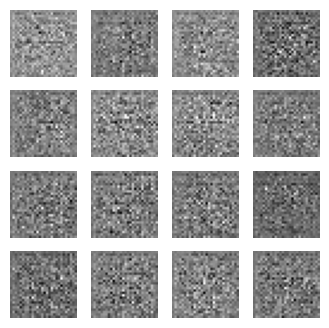

In [ ]:
import tensorflow as tf
from tensorflow.keras import layers, models
import matplotlib.pyplot as plt

# Generator model definition
def build_generator(noise_dim):
    model = models.Sequential()
    model.add(layers.Dense(7 * 7 * 256, use_bias=False, input_shape=(noise_dim,)))
    model.add(layers.BatchNormalization())
    model.add(layers.LeakyReLU())

    model.add(layers.Reshape((7, 7, 256)))
    assert model.output_shape == (None, 7, 7, 256)  # Note: None is the batch size

    model.add(layers.Conv2DTranspose(128, (5, 5), strides=(1, 1), padding='same', use_bias=False))
    assert model.output_shape == (None, 7, 7, 128)
    model.add(layers.BatchNormalization())
    model.add(layers.LeakyReLU())

    model.add(layers.Conv2DTranspose(64, (5, 5), strides=(2, 2), padding='same', use_bias=False))
    assert model.output_shape == (None, 14, 14, 64)
    model.add(layers.BatchNormalization())
    model.add(layers.LeakyReLU())

    model.add(layers.Conv2DTranspose(1, (5, 5), strides=(2, 2), padding='same', use_bias=False, activation='tanh'))
    assert model.output_shape == (None, 28, 28, 1)

    return model

# Instantiate the generator model
noise_dim = 1000
generator = build_generator(noise_dim)

# Generate images
num_examples_to_generate = 16
seed = tf.random.normal([num_examples_to_generate, noise_dim])
predictions = generator(seed, training=False)

# Display the generated images
fig = plt.figure(figsize=(4, 4))
for i in range(predictions.shape[0]):
    plt.subplot(4, 4, i+1)
    plt.imshow(predictions[i, :, :, 0], cmap='gray')
    plt.axis('off')
plt.show()

# Save the generator model
generator.save('generator_model.h5')


In [ ]:
# Assuming your discriminator model is defined and compiled
def build_discriminator(img_shape):
    model = models.Sequential()
    model.add(layers.Conv2D(64, (5, 5), strides=(2, 2), padding='same', input_shape=img_shape))
    model.add(layers.LeakyReLU(0.2))
    model.add(layers.Dropout(0.3))

    model.add(layers.Conv2D(128, (5, 5), strides=(2, 2), padding='same'))
    model.add(layers.LeakyReLU(0.2))
    model.add(layers.Dropout(0.3))

    model.add(layers.Flatten())
    model.add(layers.Dense(1))

    return model

# Instantiate generator and discriminator
noise_dim = 100
img_shape = (28, 28, 1)  # Adjust according to your image shape
generator = build_generator(noise_dim)
discriminator = build_discriminator(img_shape)

# Save generator and discriminator models
generator.save('generator_model.h5')
discriminator.save('discriminator_model.h5')

8 **Generate and Showcase Images**

Use trained generator to generate new images.
Display and showcase generated images.

1/1 [==============================] - 0s 218ms/step


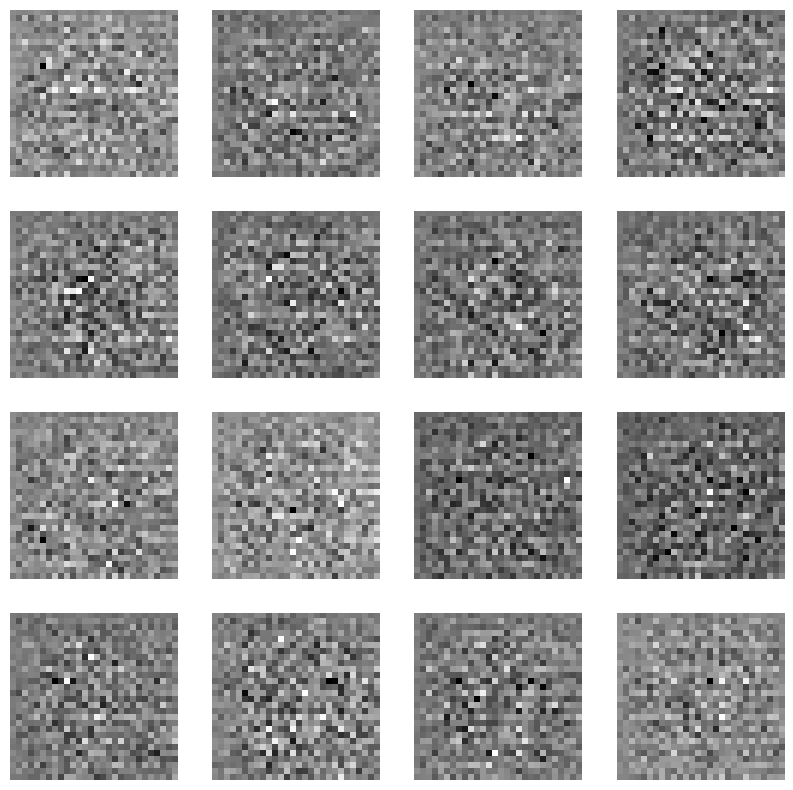

In [ ]:
import tensorflow as tf
import matplotlib.pyplot as plt

# Replace 'path_to_your_generator_model' with the actual file path to your generator model
generator = tf.keras.models.load_model('generator_model.h5')

# Generate and showcase images
generate_and_show_images(generator)


Important Notes:

Ensure proper model compilation and setup of loss functions and optimizers.

Save and load models using model.save() and tf.keras.models.load_model().

Provide correct file paths when loading saved models.
Adjust hyperparameters, architecture, and training settings based on your specific task.
Feel free to customize the code snippets based on your dataset and requirements.

Future scope

The future scope of Generative Adversarial Networks (GANs) lies in addressing key challenges and expanding their applications. Research efforts are expected to focus on improving training stability, overcoming issues like mode collapse, and refining conditional GANs for more controlled image generation